# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        return np.square(X.dot(w) - y).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return (2 / X.shape[0]) * X.T.dot((X.dot(w) - y))

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [91]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    res = []
    res.append(w_init)
    for i in range(n_iterations):
      w = res[-1] - lr * loss.calc_grad(X, y, res[-1])
      res.append(w)
    return res

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

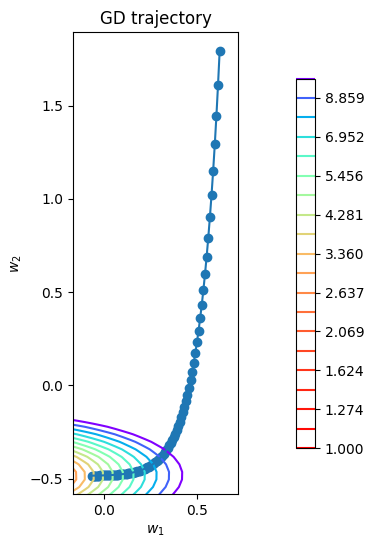

In [9]:
w_list = gradient_descent(w_init, X, y, loss, 0.0005, 100)
plot_gd(w_list, X, y, loss)

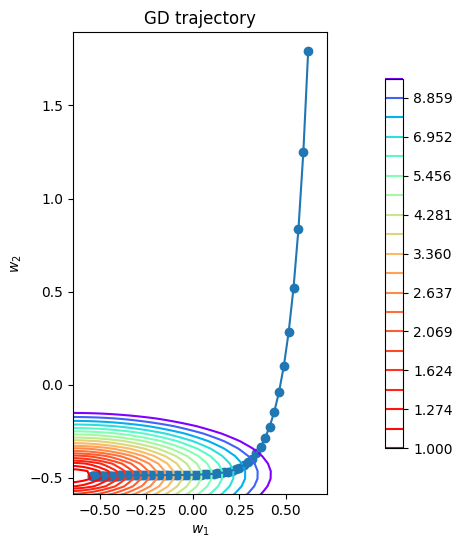

In [ ]:
#fig, axs = plt.subplots(2, 2)
w_list = gradient_descent(w_init, X, y, loss, 0.0015, 100)
plot_gd(w_list, X, y, loss)

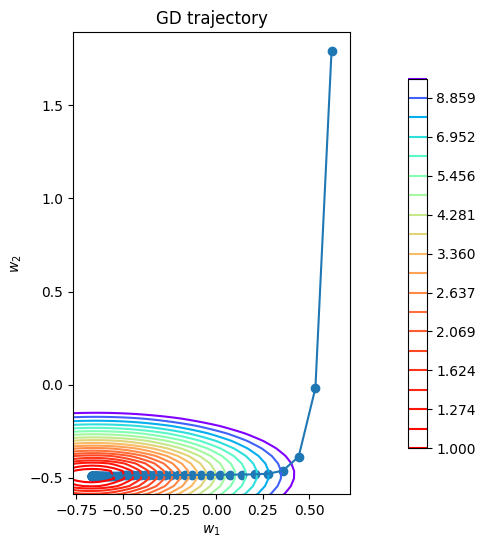

In [ ]:
w_list = gradient_descent(w_init, X, y, loss, 0.005, 100)
plot_gd(w_list, X, y, loss)

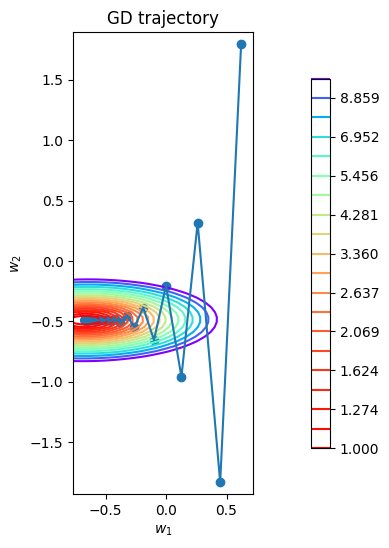

In [ ]:
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
plot_gd(w_list, X, y, loss)

__Вывод:__
* Если длина шага переменная - тогда чем ближе к минимуму, тем меньше делается шаг. ТОгда изначально шаги большие, линия спуска волатильная, потом они становятся все меньше и прямая становится более гладкой
* Если длина шага постоянна, то волатильность сохраняется на всей прямой, при этом возможны случаи, когда из-за большого шага градиент просто будет скакать около минимума и перепрыгивать его.

По рисункам видно, что чем больше шаг. тем больше изменение весов в начале (то есть прямая в начале более волатильная), однако потом она выравнивается и становится более гладкой. Если мы изначально берем маленький шаг, то прямая будет гладкой на всей области определения

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    res = []
    res.append(w_init)
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      w = res[-1] - lr * loss.calc_grad(batch, y[batch_indices], res[-1])
      res.append(w)
    return res

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [11]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

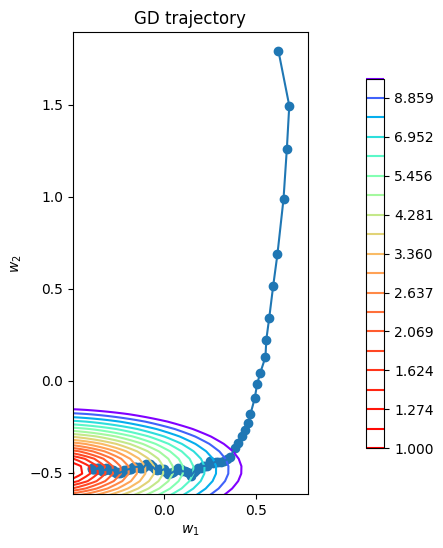

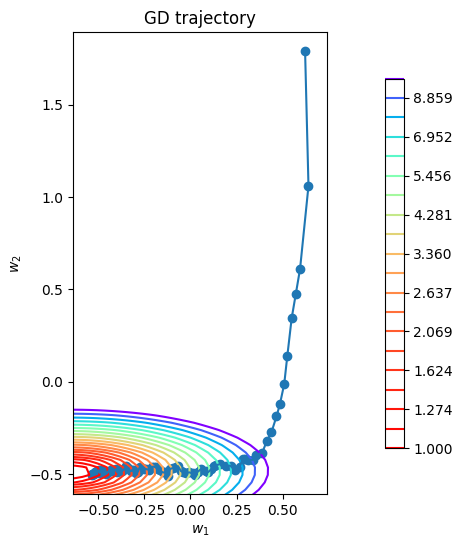

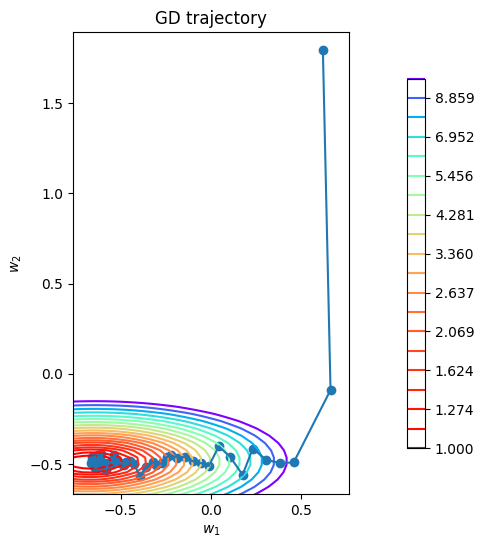

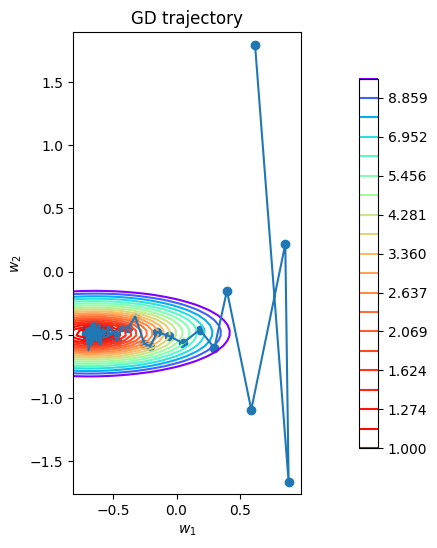

In [ ]:
#Исследуем влияние длины шага
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 20, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.0015, batch_size = 20, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.005, batch_size = 20, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 20, n_iterations = 100)
plot_gd(w_list, X, y, loss)

__Вывод о влиянии длины шага__: чем больше длина шага, тем более волатильна траектория, так как шаг оказывается больше оптимального для равномерного подхода к нужной точке минимума.

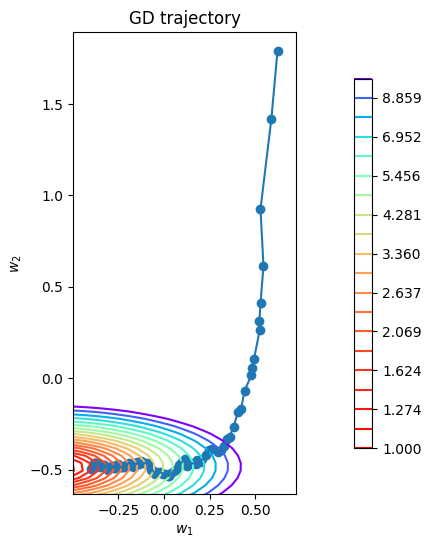

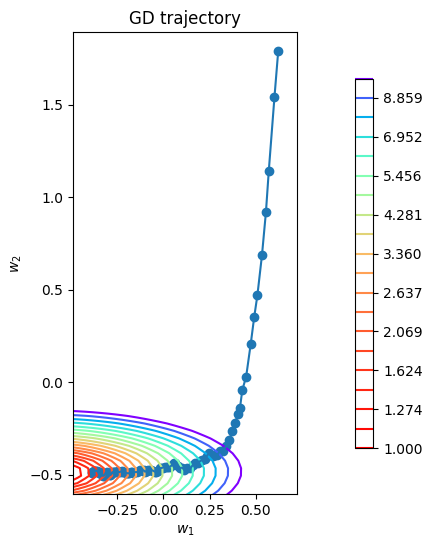

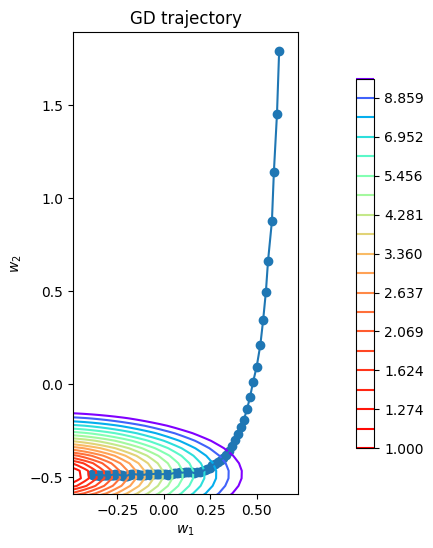

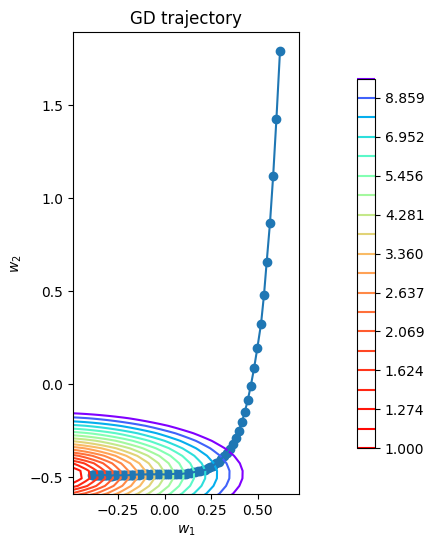

In [ ]:
#Исследуем влияние batch_size
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 10, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 30, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 150, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 250, n_iterations = 100)
plot_gd(w_list, X, y, loss)


__Вывод о влиянии batch_size__: Чем больше его размер, тем более гладкая траектория, потому что
1) Если количество объектов очень маленькое, то вероятность пойти не туда выше, то есть траектория начинает колебаться.
2) Чем больше количество приближается к полному размеру изначальной выборке, тем более стохастический градиентный спуск приближается к обычному градиентному спуску, который дает гораздо более гладкую траекторию и ищет точку более равномерно (при нормальной длине шага)

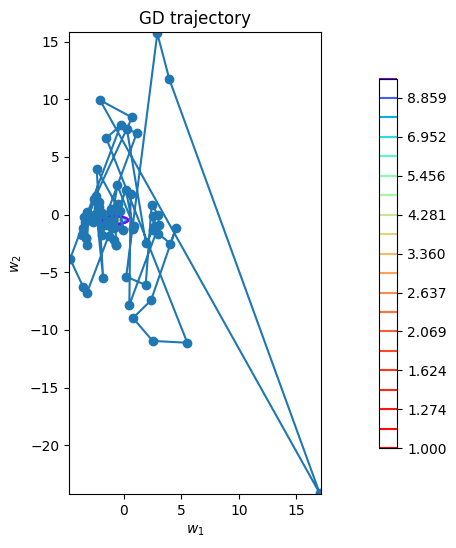

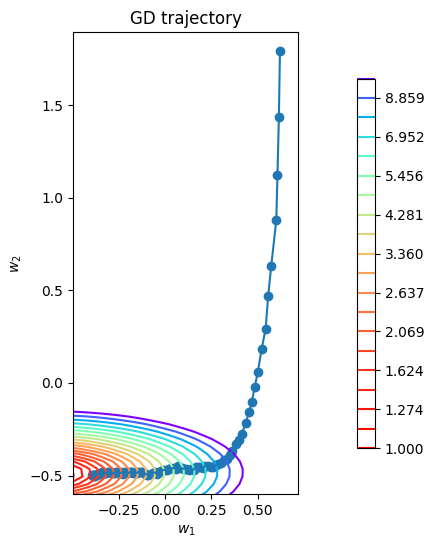

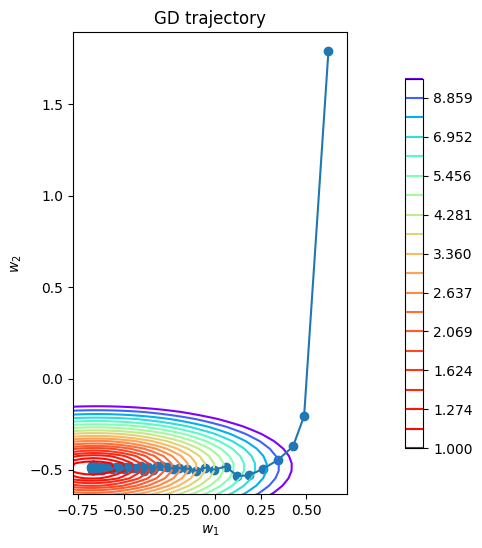

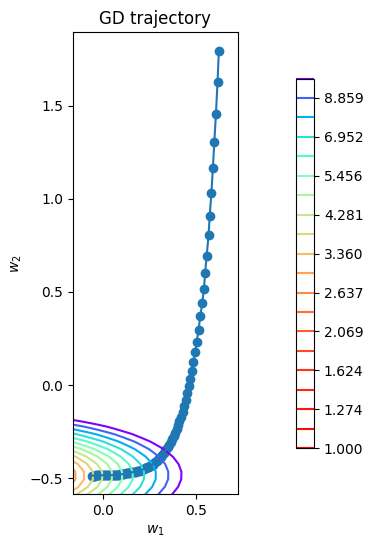

In [ ]:
# -- YOUR CODE HERE --
#Исследуем в совокупности
loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 1, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 50, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.005, batch_size = 100, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.0005, batch_size = 200, n_iterations = 100)
plot_gd(w_list, X, y, loss)

#w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 300, n_iterations = 100)
#plot_gd(w_list, X, y, loss)
#w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.001, batch_size = 10, n_iterations = 100)
#plot_gd(w_list, X, y, loss)
#w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.0015, batch_size = 20, n_iterations = 100)
#plot_gd(w_list, X, y, loss)

__Вывод__:Чем меньше шаг и больше количество объектов, по которым считается градиент, тем траектория более гладкая и равномерная - она напоминает обычный градиентный спуск.

Возможна ситуация, когда шаг слишком большой или количество объектов слишком маленькое, тогда спуск может не найти минимум, так как он постоянно будет его препрыгивать и колебаться вокруг

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    res = []
    res.append(w_init)
    s_0 = 1
    for i in range(1, n_iterations + 1):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      step = lr * (1 / (1 + i))** p
      w = res[-1] - step * loss.calc_grad(batch, y[batch_indices], res[-1])
      res.append(w)
    return res

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

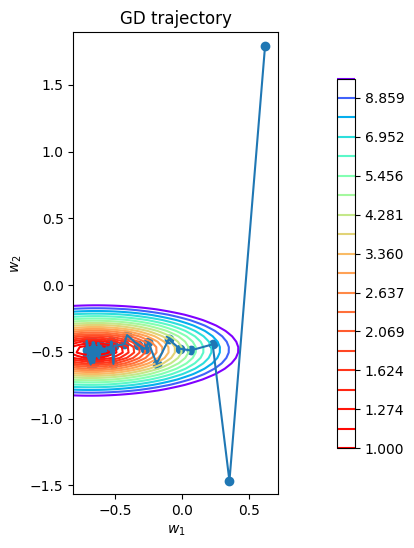

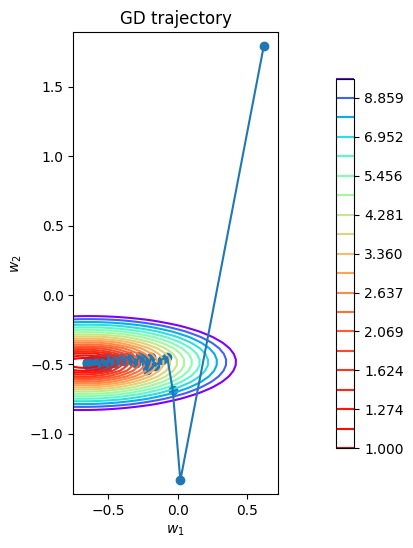

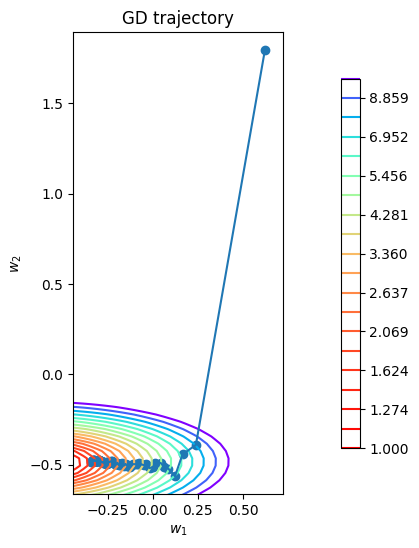

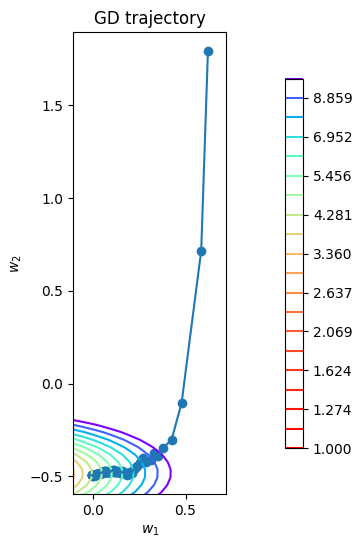

In [ ]:
# -- YOUR CODE HERE --
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 10, p = 0.1, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 10, p = 0.4, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 10, p = 0.8, n_iterations = 100)
plot_gd(w_list, X, y, loss)
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 10, p = 1, n_iterations = 100)
plot_gd(w_list, X, y, loss)

__Выводы:__ Чем больше p, тем меньше шаг на каждой итерации. То есть если взять p маленький, то как на первых итерациях шаг будет слишком большим, и спуск перелетит линии уровня, так и на последних итерациях траектория будет колебаться у оптимальной точки и может ее не найти. Чем больше p, тем меньше шаг будет и на первых итерациях (спуск не будет перелетать), так и на последних (он плавно будет подходить к точке минимума)

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

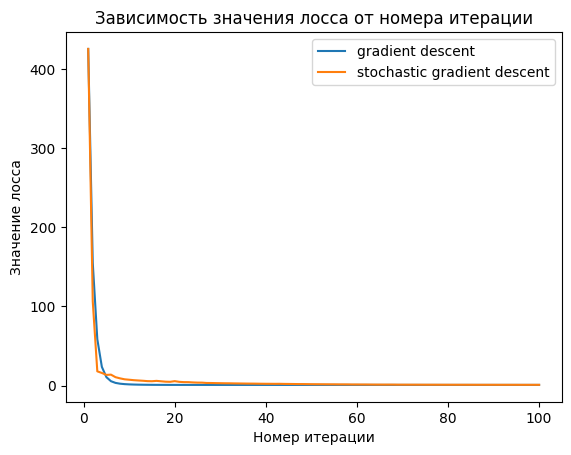

In [ ]:
# -- YOUR CODE HERE --
w_list_usual = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_list_stoch = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 10, p = 0.5, n_iterations = 100)
t = np.arange(1, 100 + 1) #номер итерации
loss_all_usual = []
loss_all_stoch = []
for i in t:
  loss_all_usual.append(loss.calc_loss(X, y, w_list_usual[i - 1]))
  loss_all_stoch.append(loss.calc_loss(X, y, w_list_stoch[i - 1]))
plt.plot(t, loss_all_usual, label = 'gradient descent')
plt.plot(t, loss_all_stoch, label = 'stochastic gradient descent')
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel('Значение лосса')
plt.title('Зависимость значения лосса от номера итерации');

__Вывод:__Преимущество SDG в том, что с точки зрений вычислений он легче (то ест этого не видно на графике), поэтому итерации выполняются быстрее. Однако если смотреть на график, для SGD (так как рандомно выбираются объекты, он волотильнее обычного градиентного спуска) нужно больше итераций для того, чтобы достичь минимальной ошибки (поэтому график скорее показывает недостаток стохастического градиентного спуска перед обычным). Однако если подобрать длину шага, для SGD можно добиться лучших результатов

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [13]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_list[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [14]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [177]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index(drop = True)

In [178]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [179]:
X_raw.columns = X_raw.columns.astype(str)

In [18]:
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [180]:
numeric_features = X_raw.select_dtypes([np.number]).columns
categorical_features = X_raw.dtypes[X_raw.dtypes == "object"].index

In [181]:
#разделяем на выборки
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, shuffle=True, random_state=42)

In [182]:
#заполняем пропуски в категорильаных данных пустыми строками
X_train[categorical_features] = X_train[categorical_features].fillna("")
X_test[categorical_features] = X_test[categorical_features].fillna("")

In [183]:
#заполняем пропуски в числовых данных
mis_replacer = SimpleImputer(strategy="mean")
X_train_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train[numeric_features]), columns=numeric_features)
X_train = pd.concat([X_train_real, X_train[categorical_features].reset_index(drop = True)], axis=1)
X_test_real = pd.DataFrame(data=mis_replacer.transform(X_test[numeric_features]), columns=numeric_features)
X_test = pd.concat([X_test_real.reset_index(drop = True), X_test[categorical_features].reset_index(drop = True)], axis=1)

In [184]:
#нормализуем вещественные переменные и кодируем категориальные
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first",), categorical_features)
])
X_train_transformed = pd.DataFrame(data=column_transformer.fit_transform(X_train))
X_test_transformed = pd.DataFrame(data=column_transformer.transform(X_test))
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-1.43486,-0.812576,1.753889,1.231535,1.543454,0.677986,0.963650,1.219020,0.938490,-1.190500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.61494,-1.120972,-0.382958,0.114657,-0.298733,0.106836,-0.480219,-0.370595,-0.639529,1.037590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.20498,0.821921,-0.857812,-1.393962,-0.995777,-1.321039,-1.122619,-0.875234,-1.300095,-0.060764,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.84482,1.993825,-0.722140,-0.427112,1.244721,-1.484225,0.486439,0.663916,2.259622,-0.437343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.43486,-0.812576,1.753889,1.231535,1.543454,0.677986,0.841289,0.411597,1.672452,-0.311817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.61494,0.000000,2.618803,2.073361,1.294510,1.983471,1.408232,-0.118275,0.498113,-0.186290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,-0.61494,0.000000,0.804179,1.248205,0.547677,0.759578,1.408232,2.127371,1.085282,0.441340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,0.20498,0.205130,-0.722140,-0.702164,-0.995777,-0.219536,-1.043084,-0.698610,-0.639529,0.127525,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
158,1.02490,0.020092,-0.247285,-0.193735,-0.149367,0.759578,-0.673959,-0.395827,-0.492736,0.472722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Это был другой способ
#разделяем на выборки
#X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, shuffle=True, random_state=42)
#cat_features_mask = (X_raw.dtypes == "object").values

#заполняем пропуски в категорильаных данных пустыми строками
#X_train_cat = X_train[X_train.columns[cat_features_mask]].fillna('').reset_index(drop=True)
#X_test_cat = X_test[X_test.columns[cat_features_mask]].fillna('').reset_index(drop=True)

#вещественные признаки
#X_train_real = X_train[X_train.columns[~cat_features_mask]]
#X_test_real = X_test[X_test.columns[~cat_features_mask]]
#заполняем пропуски в вещественных признаках
#mis_replacer = SimpleImputer(strategy="mean")
#X_train_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train_real), columns=X_train_real.columns)

#X_test_real = pd.DataFrame(data=mis_replacer.transform(X_test_real), columns=X_test_real.columns)
#enc = OneHotEncoder(handle_unknown = 'ignore')
#enc.fit(X_train_cat)

#X_train_ohe = enc.transform(X_train_cat).toarray()
#X_test_ohe = enc.transform(X_test_cat).toarray()
#убираем лишние (линейно зависимые) признаки
#cols_to_delete = [0, 22, 24, 28, 29, 34, 37, 39, 45, 52]
#X_train_ohe = np.delete(X_train_ohe, cols_to_delete, axis = 1)
#X_test_ohe = np.delete(X_test_ohe, cols_to_delete, axis = 1)
#нормализуем
#scaler = StandardScaler()
#X_train_real = scaler.fit_transform(X_train_real)
#X_test_real = scaler.transform(X_test_real)
#объединяем в единый датафрейм
#X_train = pd.DataFrame(data = np.concatenate([X_train_real, X_train_ohe], axis = 1))
#X_test = pd.DataFrame(data = np.concatenate([X_test_real, X_test_ohe], axis = 1))

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [25]:
# -- YOUR CODE HERE --
linear_regression = linear_regression.fit(X_train_transformed, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [26]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE --
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_transformed))}")

Train: 1366874.0894601843
Test: 11182034.837618776


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [27]:
from numpy import linalg

In [28]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        #return np.square(X.dot(w) - y).mean() + self.coef * (linalg.norm(w[:-1]))**2
        return np.square(X.dot(w) - y).mean() + self.coef * np.sum(w[:-1] ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        w_new = np.copy(w)
        w_new[-1] = 0
        return (2 / X.shape[0]) * X.T.dot(X.dot(w) - y) + 2 * self.coef * w_new

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [29]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [30]:
#обучение
linear_regression = linear_regression.fit(X_train_transformed, y_train)

In [31]:
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_transformed))}")

Train: 4622985.0105597535
Test: 21089954.804637365


In [35]:
params = np.logspace(-20, 2, 20)[:-2]
result = 11182157.243546708 #значение лосса без регуляризации
best_param = 0
loss = []
for param in params:
  #print(param)
  linear_regression = LinearRegression(MSEL2Loss(param))
  linear_regression = linear_regression.fit(X_train_transformed, y_train)
  metrics = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
  loss.append(metrics)
  print(f'{param}: {metrics}')
  if result > metrics:
    best_param = param
    result = metrics
print(f'Best parameter: {best_param}')

1e-20: 11182103.485024681
1.4384498882876659e-19: 11182419.86464564
2.0691380811147986e-18: 11182308.020812634
2.976351441631313e-17: 11182148.075228028
4.281332398719396e-16: 11182240.26395814
6.15848211066028e-15: 11182450.082068145
8.858667904100832e-14: 11182194.592507552
1.2742749857031321e-12: 11182140.515345024
1.8329807108324375e-11: 11181893.940247757
2.6366508987303664e-10: 11182259.761439685
3.792690190732254e-09: 11182215.948891364
5.4555947811685146e-08: 11180799.928589726
7.847599703514623e-07: 11162518.665568255
1.1288378916846929e-05: 10913846.876235403
0.00016237767391887175: 9092406.913948229
0.002335721469090121: 8121215.689307585
0.03359818286283788: 15717956.074405504
0.4832930238571772: 32572471.965006992
Best parameter: 0.002335721469090121


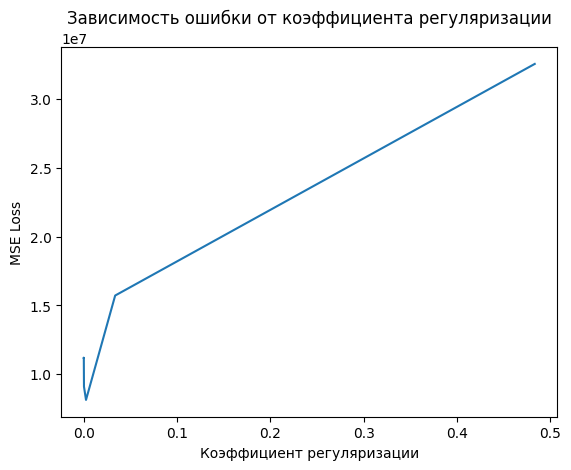

In [38]:
plt.title('Зависимость ошибки от коэффициента регуляризации')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('MSE Loss')
plt.plot(params, loss);

In [43]:
params = np.linspace(0.00016237767391887175, 0.0038774671393543175, 10)
result = 8121215.689307585 #значение лосса из предыдущего перебора - ищем результат получше
best_param = 0
loss = []
for param in params:
  #print(param)
  linear_regression = LinearRegression(MSEL2Loss(param))
  linear_regression = linear_regression.fit(X_train_transformed, y_train)
  metrics = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
  loss.append(metrics)
  print(f'{param}: {metrics}')
  if result > metrics:
    best_param = param
    result = metrics
print(f'Best parameter: {best_param}')

0.00016237767391887175: 9092407.517857803
0.0005751653923005879: 7925493.87985359
0.0009879531106823042: 7726121.3451155145
0.0014007408290640203: 7764520.913383074
0.0018135285474457365: 7896422.925687691
0.002226316265827453: 8071007.82611256
0.002639103984209169: 8265431.5226199515
0.0030518917025908854: 8468064.298643347
0.0034646794209726014: 8672569.413717907
0.0038774671393543175: 8875373.768339148
Best parameter: 0.0009879531106823042


In [45]:
params = np.linspace(0.0005751653923005879, 0.0014007408290640203, 10)
result = 7726121.34511551455 #значение лосса из предыдущего перебора - ищем результат получше
best_param = 0
loss = []
for param in params:
  #print(param)
  linear_regression = LinearRegression(MSEL2Loss(param))
  linear_regression = linear_regression.fit(X_train_transformed, y_train)
  metrics = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
  loss.append(metrics)
  print(f'{param}: {metrics}')
  if result > metrics:
    best_param = param
    result = metrics
print(f'Best parameter: {best_param}')

0.0005751653923005879: 7925493.878155047
0.0006668959963854138: 7844327.850237066
0.0007586266004702396: 7788978.0448830705
0.0008503572045550653: 7753025.930675405
0.0009420878086398912: 7732035.329208506
0.001033818412724717: 7722828.3587073
0.001125549016809543: 7723059.223384196
0.0012172796208943686: 7730952.014115166
0.0013090102249791943: 7745133.191080467
0.0014007408290640203: 7764520.913292984
Best parameter: 0.001033818412724717


In [63]:
linear_regression = LinearRegression(MSEL2Loss(0.001033818412724717))
linear_regression = linear_regression.fit(X_train_transformed, y_train)
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_transformed))}")

Train: 1571257.0204029523
Test: 7722828.3588708555


__ВЫВОД__: Для многих значений коэффициентов регуляризации ошибка превышает ошибку при обучении без регуляризации. Также коэффициенты регуляризации, которые все-таки улучшают качество модели, очень близки к нулю (лучший коэффициент = 0.001033818412724717, минимальная ошибка = 7722828.3587073). В целом, применив регуляризацию, качество модели на тестовых данных удалось улучшить

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [46]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        diff = X.dot(w) - y
        result = np.zeros_like(y)
        mask = (diff < self.eps) & (diff > -self.eps)
        result[mask] = diff[mask] ** 2 / 2
        result[~mask] = self.eps * (np.abs(diff[~mask]) - (1 / 2) * self.eps)
        return result.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        diff = X.dot(w) - y
        result = np.zeros_like(y)
        mask = (diff < self.eps) & (diff > -self.eps)
        result[mask] = diff[mask]
        result[~mask] = self.eps * np.sign(diff[~mask])
        result = result.reshape((-1, 1))
        result = np.sum(np.repeat(result, X.shape[1], axis = 1) * X, axis = 0) / X.shape[0]

        return result

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [49]:
# -- YOUR CODE HERE --
linear_regression = LinearRegression(HuberLoss(1000))
linear_regression = linear_regression.fit(X_train_transformed, y_train)
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_transformed))}")

Train: 1710992.5114789598
Test: 10705117.804665145


In [55]:
params = np.linspace(0.01, 1000, 10)
result = 11182157.243546708 #значение лосса без регуляризации
best_param = 0
loss = []
for param in params:
  #print(param)
  linear_regression = LinearRegression(HuberLoss(param))
  linear_regression = linear_regression.fit(X_train_transformed, y_train)
  metrics = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
  loss.append(metrics)
  print(f'{param}: {metrics}')
  if result > metrics:
    best_param = param
    result = metrics
print(f'Best parameter: {best_param}')

0.01: 355290172.04858065
111.12: 9459209.30450316
222.23: 8815993.388896722
333.34: 9125386.227268334
444.45: 9652822.300293813
555.56: 9687319.878549963
666.67: 9976339.008065842
777.78: 10269016.425325083
888.89: 10510515.688427756
1000.0: 10705213.50566597
Best parameter: 222.23


In [56]:
params = np.linspace(111.12, 333.34, 10)
result = 8815993.388896722 #значение лосса из предыдущего перебора
best_param = 0
loss = []
for param in params:
  #print(param)
  linear_regression = LinearRegression(HuberLoss(param))
  linear_regression = linear_regression.fit(X_train_transformed, y_train)
  metrics = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
  loss.append(metrics)
  print(f'{param}: {metrics}')
  if result > metrics:
    best_param = param
    result = metrics
print(f'Best parameter: {best_param}')

111.12: 9459522.78204985
135.8111111111111: 8991485.020228727
160.50222222222223: 8741844.84046446
185.19333333333333: 8668862.325035362
209.88444444444445: 8783859.634667369
234.57555555555555: 8845977.0482605
259.26666666666665: 8897823.321907444
283.9577777777778: 8946363.02616298
308.6488888888889: 9026066.341432648
333.34: 9125615.811620113
Best parameter: 185.19333333333333


In [60]:
params = np.linspace(179.3338515470203, 179.60481024234113, 10)
result = 8668862.325035362 #значение лосса из предыдущего перебора
best_param = 0
loss = []
for param in params:
  #print(param)
  linear_regression = LinearRegression(HuberLoss(param))
  linear_regression = linear_regression.fit(X_train_transformed, y_train)
  metrics = mean_squared_error(y_test, linear_regression.predict(X_test_transformed))
  loss.append(metrics)
  print(f'{param}: {metrics}')
  if result > metrics:
    best_param = param
    result = metrics
print(f'Best parameter: {best_param}')

179.3338515470203: 8662264.55577438
179.3639580687226: 8662860.613183308
179.39406459042493: 8662471.982425384
179.42417111212723: 8662577.609192608
179.45427763382955: 8662427.123838685
179.48438415553187: 8662011.126474658
179.5144906772342: 8662472.68198096
179.5445971989365: 8662813.130158229
179.5747037206388: 8662276.868261032
179.60481024234113: 8662242.08026301
Best parameter: 179.48438415553187


In [62]:
# -- YOUR CODE HERE --
linear_regression = LinearRegression(HuberLoss(179.48438415553187))
linear_regression = linear_regression.fit(X_train_transformed, y_train)
print(f"Train: {mean_squared_error(y_train, linear_regression.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, linear_regression.predict(X_test_transformed))}")

Train: 2120905.0230249804
Test: 8662309.11352727


__Вывод__: Результат обучения модели с функцией потерь Huber Loss дал лучший параметр - 179.48438415553187 и ошибку 8662309.11352727 на тестовой выборке. Эта справляется лучше, чем модель без регуляризации, однако модель с MSE Loss и регуляризацией справляется еще лучше (как на тестовой, так и на обучающей выборке ошибка меньше).

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

<a href="https://ibb.co/XZ1WN9G"><img src="https://i.ibb.co/Z65ft3b/scale-2400.jpg" alt="scale-2400" border="0"></a>

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [73]:
import math

In [193]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    step: float
) -> List[np.ndarray]:


    initial_temp = 100
    final_temp = 0.01 #используем линейную функцию
    current_temp = initial_temp
    old_w = w_init
    trajectory = []
    trajectory.append(old_w)
    while current_temp > final_temp:
      new_w = old_w + np.random.standard_t(3, size=old_w.shape)
      cost_diff = loss.calc_loss(X, y, old_w) - loss.calc_loss(X, y, new_w)
      if cost_diff > 0:
        old_w = new_w
        trajectory.append(old_w)
      else:
        try:
           if np.random.uniform(0, 1) < math.exp(-1 * cost_diff / current_temp):
            old_w = new_w
            trajectory.append(old_w)
        except:
          current_temp+=step
      current_temp -= step
    return trajectory

In [186]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    res = []
    res.append(w_init)
    for i in range(n_iterations):
      w = res[-1] - lr * loss.calc_grad(X, y, res[-1])
      res.append(w)
    return res

In [187]:
#обрабатываем данные, чтобы применить методы
np.random.seed(1337)
loss = MSELoss()
X_train_transformed = np.asarray(X_train_transformed)
y_train = np.asarray(y_train)
X_test_transformed = np.asarray(X_test_transformed)
y_test = np.asarray(y_test)
# Добавляем столбец из единиц для константного признака
X_train_transformed = np.hstack([X_train_transformed, np.ones([X_train_transformed.shape[0], 1])])
X_test_transformed = np.hstack([X_test_transformed, np.ones([X_test_transformed.shape[0], 1])])

In [188]:
#применяем градиентный спуск, чтобы получить траекторию
w_init = np.random.uniform(-2, 2, (X_train_transformed.shape[1]))
w_list_grad = gradient_descent(w_init, X_train_transformed, y_train, loss, 0.01, 10000)
print('Train: ',loss.calc_loss(X_train_transformed, y_train, w_list_grad[-1]))
print('Test: ',loss.calc_loss(X_test_transformed, y_test, w_list_grad[-1]))

Train:  1965739.9649203487
Test:  9152038.48111437


In [194]:
#применяем метод имитации отжига
n_iterations = 10000
step = (100 - 0.01) / n_iterations #определяем шаг так, чтобы было одинаковое с градиентным спуском количество итераций
w_list_sa = simulated_annealing(w_init, X_train_transformed, y_train, loss, step = step)
print('Train: ', loss.calc_loss(X_train_transformed, y_train, w_list_sa[-1]))
print('Test: ', loss.calc_loss(X_test_transformed, y_test, w_list_sa[-1]))

Train:  10159473.886616115
Test:  45019035.725248724


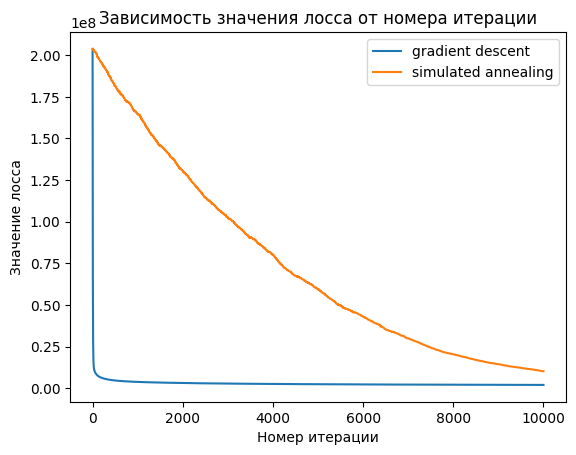

In [195]:
t = np.arange(1, n_iterations + 1) #номер итерации
loss_all_grad = []
loss_all_sa = []
for i in t:
  loss_all_grad.append(loss.calc_loss(X_train_transformed, y_train, w_list_grad[i - 1]))
  loss_all_sa.append(loss.calc_loss(X_train_transformed, y_train, w_list_sa[i - 1]))
plt.plot(t, loss_all_grad, label = 'gradient descent')
plt.plot(t, loss_all_sa, label = 'simulated annealing')
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel('Значение лосса')
plt.title('Зависимость значения лосса от номера итерации');

__Вывод__: Если использовать линейную функцию в методе имитации отжига, то градиентный спуск оказывается лучше, так как он быстрее находит минимум и дает меньшую ошибку (однако предполагаю, что нужно использовать нелинейную функцию при изменении температуры)